In [1]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler, RobustScaler, minmax_scale
from datetime import datetime

sys.path.append('../../library/')

from data import load_scaled_datasets, load_raw_datasets, calc_z_bins

In [2]:
path_data = "/glade/p/cisl/aiml/ai4ess_hackathon/holodec/"
num_particles = 3
output_cols = ["z", "hid"]
scaler_out = MinMaxScaler()
subset = False
num_z_bins = 5
mass = False


In [3]:
train_inputs,\
train_outputs,\
valid_inputs,\
valid_outputs = load_scaled_datasets(path_data,
                                     num_particles,
                                     output_cols,
                                     scaler_out,
                                     subset,
                                     num_z_bins,
                                     mass)


In [4]:
print(train_inputs.shape)
print(train_outputs.shape)
print(valid_inputs.shape)
print(valid_outputs.shape)

(50000, 600, 400, 1)
(50000, 5)
(10000, 600, 400, 1)
(10000, 5)


In [5]:
def ranked_probability_score(y_true, y_pred):
    return np.mean((np.cumsum(y_true, axis=1) - np.cumsum(y_pred, axis=1)) ** 2) / (y_true.shape[1] -1)

In [6]:
model_path = "/glade/p/cisl/aiml/ggantos/holodec/zdist"
models = [x[0] for x in os.walk(model_path)][1:]
models

['/glade/p/cisl/aiml/ggantos/holodec/zdist/base_10',
 '/glade/p/cisl/aiml/ggantos/holodec/zdist/base_filters4816',
 '/glade/p/cisl/aiml/ggantos/holodec/zdist/base_20_filters4816',
 '/glade/p/cisl/aiml/ggantos/holodec/zdist/base_20',
 '/glade/p/cisl/aiml/ggantos/holodec/zdist/base_10_filters4816',
 '/glade/p/cisl/aiml/ggantos/holodec/zdist/base_100_filters4816',
 '/glade/p/cisl/aiml/ggantos/holodec/zdist/base',
 '/glade/p/cisl/aiml/ggantos/holodec/zdist/base_10_filters4816_100',
 '/glade/p/cisl/aiml/ggantos/holodec/zdist/base_10_filters4816_50',
 '/glade/p/cisl/aiml/ggantos/holodec/zdist/base_1000_filters4816']

base


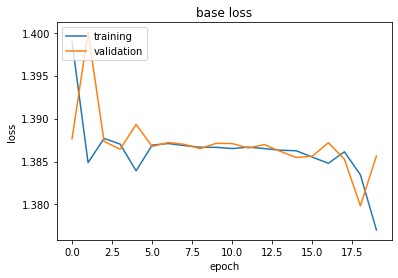

0.010517159589912726 0.01427055592311093
RPSS: 0.263
base_filters4816


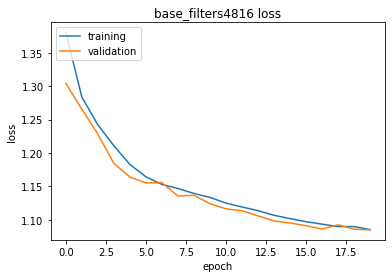

0.0031149199807277133 0.01427055592311093
RPSS: 0.782


In [7]:
for model in ["base", "base_filters4816"]:
    print(model)
    train_outputs_pred = np.genfromtxt(os.path.join(model_path, model, "train_outputs_pred.csv"))
    valid_outputs_pred = np.genfromtxt(os.path.join(model_path, model, "valid_outputs_pred.csv"))
    
    loss = np.genfromtxt(os.path.join(model_path, model, "loss.csv"))
    val_loss = np.genfromtxt(os.path.join(model_path, model, "val_loss.csv"))    
    plt.plot(loss)
    plt.plot(val_loss)
    plt.title(f'{model} loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['training', 'validation'], loc='upper left')
    plt.show()
    
    rps_nn = ranked_probability_score(valid_outputs, valid_outputs_pred)
    rps_climo = ranked_probability_score(valid_outputs, np.ones(valid_outputs_pred.shape) / valid_outputs_pred.shape[1])
    print(rps_nn, rps_climo)
    rpss = 1 - rps_nn / rps_climo
    print(f"RPSS: {rpss:0.3f}")

In [8]:
num_z_bins = 10

train_inputs_10,\
train_outputs_10,\
valid_inputs_10,\
valid_outputs_10 = load_scaled_datasets(path_data,
                                     num_particles,
                                     output_cols,
                                     scaler_out,
                                     subset,
                                     num_z_bins,
                                     mass)


base_10


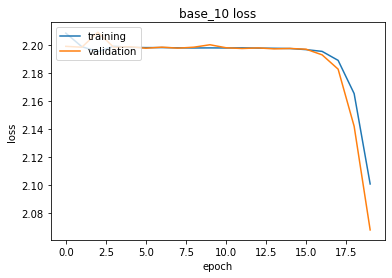

0.003716595393042229 0.005928222331901403
RPSS: 0.373
base_10_filters4816


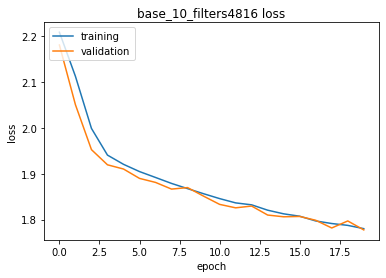

0.0017645029331601692 0.005928222331901403
RPSS: 0.702
base_10_filters4816_50


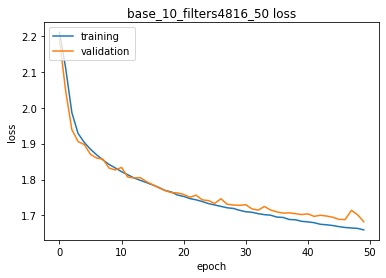

0.0014964753637499606 0.005928222331901403
RPSS: 0.748
base_10_filters4816_100


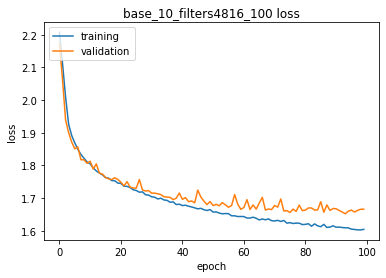

0.0013805182182919094 0.005928222331901403
RPSS: 0.767


In [16]:
for model in ["base_10", "base_10_filters4816", "base_10_filters4816_50", "base_10_filters4816_100"]:
    print(model)
    train_outputs_pred = np.genfromtxt(os.path.join(model_path, model, "train_outputs_pred.csv"))
    valid_outputs_pred = np.genfromtxt(os.path.join(model_path, model, "valid_outputs_pred.csv"))
    
    loss = np.genfromtxt(os.path.join(model_path, model, "loss.csv"))
    val_loss = np.genfromtxt(os.path.join(model_path, model, "val_loss.csv"))    
    plt.plot(loss)
    plt.plot(val_loss)
    plt.title(f'{model} loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['training', 'validation'], loc='upper left')
    plt.show()
    
    rps_nn = ranked_probability_score(valid_outputs_10, valid_outputs_pred)
    rps_climo = ranked_probability_score(valid_outputs_10, np.ones(valid_outputs_pred.shape) / valid_outputs_pred.shape[1])
    print(rps_nn, rps_climo)
    rpss = 1 - rps_nn / rps_climo
    print(f"RPSS: {rpss:0.3f}")

In [10]:
num_z_bins = 20

train_inputs_20,\
train_outputs_20,\
valid_inputs_20,\
valid_outputs_20 = load_scaled_datasets(path_data,
                                     num_particles,
                                     output_cols,
                                     scaler_out,
                                     subset,
                                     num_z_bins,
                                     mass)


base_20


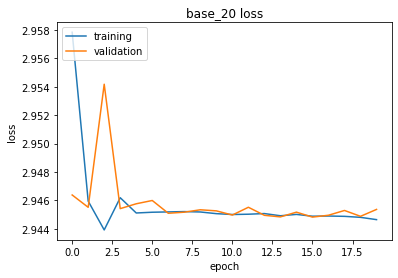

0.0027957477094777473 0.002839871380040351
RPSS: 0.016
base_20_filters4816


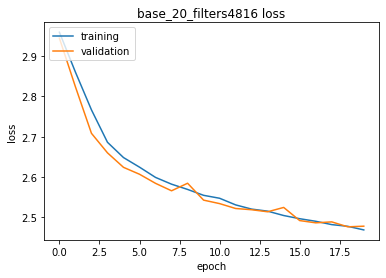

0.000945991524759133 0.002839871380040351
RPSS: 0.667


In [11]:
for model in ["base_20", "base_20_filters4816"]:
    print(model)
    train_outputs_pred = np.genfromtxt(os.path.join(model_path, model, "train_outputs_pred.csv"))
    valid_outputs_pred = np.genfromtxt(os.path.join(model_path, model, "valid_outputs_pred.csv"))
    
    loss = np.genfromtxt(os.path.join(model_path, model, "loss.csv"))
    val_loss = np.genfromtxt(os.path.join(model_path, model, "val_loss.csv"))    
    plt.plot(loss)
    plt.plot(val_loss)
    plt.title(f'{model} loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['training', 'validation'], loc='upper left')
    plt.show()
    
    rps_nn = ranked_probability_score(valid_outputs_20, valid_outputs_pred)
    rps_climo = ranked_probability_score(valid_outputs_20, np.ones(valid_outputs_pred.shape) / valid_outputs_pred.shape[1])
    print(rps_nn, rps_climo)
    rpss = 1 - rps_nn / rps_climo
    print(f"RPSS: {rpss:0.3f}")

In [12]:
num_z_bins = 100

train_inputs_100,\
train_outputs_100,\
valid_inputs_100,\
valid_outputs_100 = load_scaled_datasets(path_data,
                                     num_particles,
                                     output_cols,
                                     scaler_out,
                                     subset,
                                     num_z_bins,
                                     mass)


base_100_filters4816


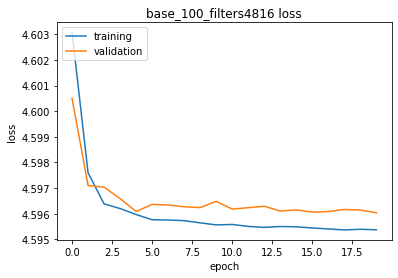

0.0005610363334040299 0.0005612834156880139
RPSS: 0.000


In [13]:
for model in ["base_100_filters4816"]:
    print(model)
    train_outputs_pred = np.genfromtxt(os.path.join(model_path, model, "train_outputs_pred.csv"))
    valid_outputs_pred = np.genfromtxt(os.path.join(model_path, model, "valid_outputs_pred.csv"))
    
    loss = np.genfromtxt(os.path.join(model_path, model, "loss.csv"))
    val_loss = np.genfromtxt(os.path.join(model_path, model, "val_loss.csv"))    
    plt.plot(loss)
    plt.plot(val_loss)
    plt.title(f'{model} loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['training', 'validation'], loc='upper left')
    plt.show()
    
    rps_nn = ranked_probability_score(valid_outputs_100, valid_outputs_pred)
    rps_climo = ranked_probability_score(valid_outputs_100, np.ones(valid_outputs_pred.shape) / valid_outputs_pred.shape[1])
    print(rps_nn, rps_climo)
    rpss = 1 - rps_nn / rps_climo
    print(f"RPSS: {rpss:0.3f}")

In [14]:
num_z_bins = 1000

train_inputs_1000,\
train_outputs_1000,\
valid_inputs_1000,\
valid_outputs_1000 = load_scaled_datasets(path_data,
                                     num_particles,
                                     output_cols,
                                     scaler_out,
                                     subset,
                                     num_z_bins,
                                     mass)


base_1000_filters4816


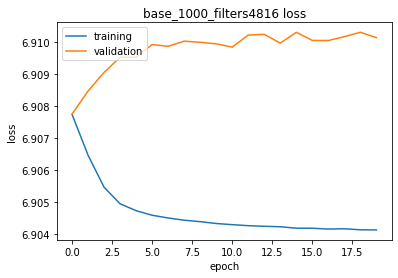

5.610149947541736e-05 5.610062050627088e-05
RPSS: -0.000


In [15]:
for model in ["base_1000_filters4816"]:
    print(model)
    train_outputs_pred = np.genfromtxt(os.path.join(model_path, model, "train_outputs_pred.csv"))
    valid_outputs_pred = np.genfromtxt(os.path.join(model_path, model, "valid_outputs_pred.csv"))
    
    loss = np.genfromtxt(os.path.join(model_path, model, "loss.csv"))
    val_loss = np.genfromtxt(os.path.join(model_path, model, "val_loss.csv"))    
    plt.plot(loss)
    plt.plot(val_loss)
    plt.title(f'{model} loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['training', 'validation'], loc='upper left')
    plt.show()
    
    rps_nn = ranked_probability_score(valid_outputs_1000, valid_outputs_pred)
    rps_climo = ranked_probability_score(valid_outputs_1000, np.ones(valid_outputs_pred.shape) / valid_outputs_pred.shape[1])
    print(rps_nn, rps_climo)
    rpss = 1 - rps_nn / rps_climo
    print(f"RPSS: {rpss:0.3f}")